**классификатор kNN**


Евгений Борисов esborisov@sevsu.ru

---

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
np.set_printoptions(precision=2) # ограничиваем точность float для печати

---

In [3]:
# генерируем два рандомных набора точек на плоскости
n = 150 # количество точек в одном наборе
data = [ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,0.6] ]

In [4]:
# разбираем точки в учебный набор
X = np.vstack(data) # матрица признаков
y = np.asarray( [0]*len(data[0]) + [1]*len(data[1]) ) # вектор меток класса

In [5]:
# точки для тестовой классификации
nn = 5
u = np.random.rand(nn,2)+[0,0.2]

---

In [6]:
# профиль компактности
def comp_prof(X,y):
    r = euclidean_distances(X) # матрица расстояний (Евклидова метрика)
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(r.shape) # номера классов для соседей в порядке увеличения расстояния 
    # инвертируем метку класса 1 для подсчёта точек-соседей из чужих классов
    nc = np.vstack([ (nc[ nc[:,0]==1 ]-1)*-1, nc[ nc[:,0]==0 ] ])
    # считаем чужих соседей k-тых в очереди удаления от объекта
    pc = np.asarray([ nc[:,k].sum() for k in range(1,nc.shape[1]) ])
    return pc / pc.max()

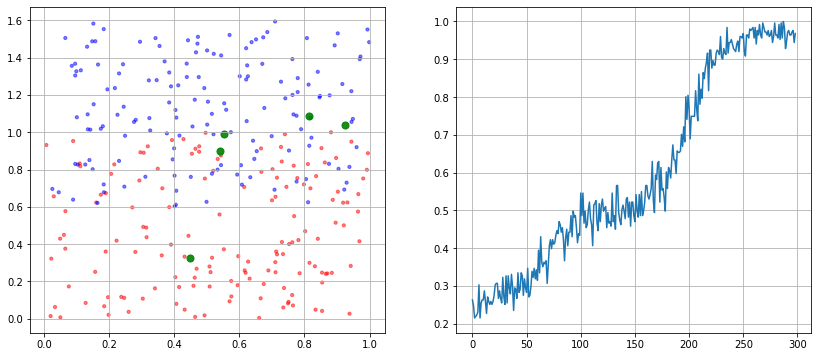

In [7]:
# рисуем точки

# создаём два элемента в ряд 
fig, (ax1,ax2) = plt.subplots(1,2, sharey=False, sharex=False, figsize=(14,6),)
# в первом рисуем точки 
ax1.scatter( X[:,0],X[:,1], s=10, alpha=0.5, c=list(map(lambda c:{0:'r',1:'b'}[c],y)) )
ax1.scatter( u[:,0],u[:,1],s=50, alpha=0.9, c='g')
ax1.grid()
# во втором рисуем профиль компактности
ax2.plot( comp_prof(X,y) ) 
ax2.grid()
# выводим всё на печать
plt.show()

---

In [8]:
r = euclidean_distances(u,X) # расстояния от тестовых точек u до точек учебного набора X
r

array([[0.33, 0.31, 0.43, ..., 0.61, 0.91, 1.21],
       [0.54, 0.54, 0.16, ..., 0.11, 0.35, 0.62],
       [0.62, 0.62, 0.24, ..., 0.14, 0.27, 0.53],
       [0.65, 0.66, 0.52, ..., 0.31, 0.23, 0.53],
       [0.68, 0.69, 0.47, ..., 0.25, 0.12, 0.44]])

In [9]:
ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
ri

array([[116,  53, 113, ..., 210, 268, 202],
       [ 18,  94,  25, ...,  54, 106,  66],
       [288, 243, 102, ...,  54, 106,  66],
       [262, 259,  76, ...,  54, 106,  66],
       [228, 188, 291, ...,  54, 106,  66]])

In [10]:
nc = y[ ri.flatten() ].reshape(ri.shape) # номера классов для соседей в порядке увеличения расстояния 
nc

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [11]:
k=7 
knc = nc[:,:k] # классы ближайших k соседей
knc

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0]])

In [12]:
o = (knc.sum(axis=1) > k/2).astype(int) # какого класса больше в ближайших k соседях
o

array([0, 0, 1, 1, 1])

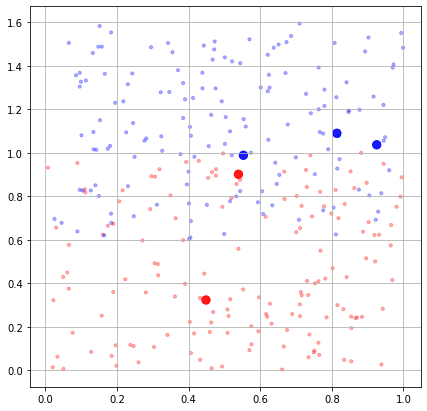

In [13]:
plt.figure(figsize=(7,7))
plt.scatter( X[:,0],X[:,1], s=10, alpha=0.3, c=list(map(lambda c:{0:'r',1:'b'}[c],y)) )
plt.scatter( u[:,0],u[:,1], s=70, alpha=0.9, c=list(map(lambda c:{0:'r',1:'b'}[c],o)) )
plt.grid()
plt.show()

In [14]:
# sklearn.neighbors.KNeighborsClassifier

In [15]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.8.9
IPython version      : 8.3.0

matplotlib: 3.5.2
numpy     : 1.22.3

